Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

Generation of dummy data

In [3]:
def generate_data(seq_length,num_samples):
    X = []
    y = []
    for _ in range(num_samples):
        start = np.random.rand()
        seq = np.array([start + i * 0.1 for i in range(seq_length)])
        X.append(seq)
        y.append(seq[-1] + 0.1)
    return np.array(X), np.array(y)

In [4]:
seq_length = 10
num_samples = 1000

X_train, y_train = generate_data(seq_length, num_samples)
X_train = X_train.reshape((num_samples, seq_length, 1))

Build LSTM Model

In [5]:
model = Sequential()
model.add(LSTM(32, input_shape=(seq_length, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train the model

In [6]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.6098
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0382
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4639e-04
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6853e-04
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7758e-04
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.9356e-04
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6629e-04
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4839e-04
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.4368e-04
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 

Plot of loss versus epochs

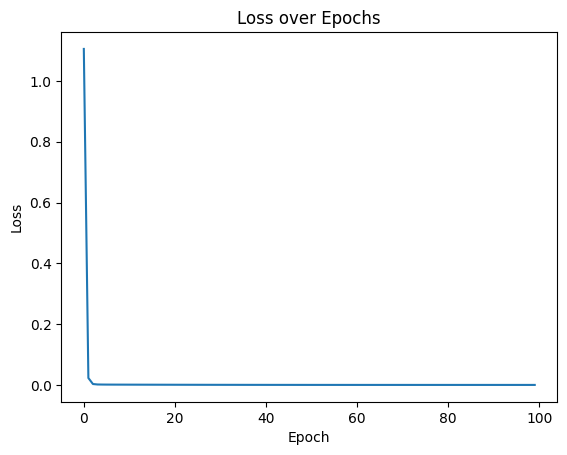

In [7]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()